# **Modern Theory of Detection and Estimation**
## **Lab 1. Machine Learning for Regression**
### **Academic Year 2022/2023** 

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66, 67 and 69)
*   Telecomunication Technologies Engineering (groups 91, 92 and 95)
*   Telematic Engineering (group 71 and 79)

Department of Signal Processing and Communications



#**Objective**

Your neighbor Jane is a real estate agent and wants some help predicting housing prices for regions in the suburbs of Boston (USA). It would be great if you could somehow create a model that allows her to put in a few features of a house and returns an estimate of what the house would sell for.

Jane has asked you if you could help her out with your new data science skills. You say yes, and decide that implementing some regression models might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in the suburbs of Boston (USA).

**Let's get started!**



We have been able to get some data from your neighbor for housing prices. Let us get our environment ready with the necessary libraries and then import the data!


In [2]:
#Import the Python libraries that are used in this lab assignment
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# <font color = 'black'> 1. Boston housing dataset </font>

## 1.1 Description

We will take the Housing dataset, which contains information about different houses in Boston. This data was originally a part of [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). While it is no longer available there, we can still access it through the `scikit-learn` library. There are 506 samples and 13 feature variables in this dataset. The objective is to estimate the value of prices of the houses (`PRICE`) using the 13 given features.

### Getting the data

In [3]:
#From sklearn tutorial
from sklearn.datasets import load_boston
boston = load_boston(return_X_y=False)
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [4]:
#A "Bunch", if you remember, is a dictionary-based dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#DESCR sounds like it could be useful. Let's print the description.
print(boston['DESCR'])
#target, es el parametro a estimar, del que tenemos las observaciones.
#data son los datos de todos los campos.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Let's obtain the numpy matrices and the feature names
X = boston.data
y = boston.target
feature_names = boston.feature_names

# Let's print the feature names
print("Feature names:")
print(feature_names)

# Let's print the first sample from the dataset
print("\nThese are the feature values of the first sample:")
print(X[0,:])

print("\nThis is the target value (PRICE) of the first sample:")
print(y[0])


Feature names:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

These are the feature values of the first sample:
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]

This is the target value (PRICE) of the first sample:
24.0


In [7]:
#How many samples are there in the dataset? Print it out!
#YOUR CODE HERE
from random import sample
samples = X.shape[0];
print(samples)

506


In [8]:
#What is the number of features per sample? Print it out!
#YOUR CODE HERE
fields = X.shape[-1]
print(fields)


13


Let's see the mean, std, min and max values of every feature and the target value:

In [9]:
#YOUR CODE HERE
mean_taget = np.mean(y)
means = np.array([np.mean(X[:,0]),np.mean(X[:,1]),np.mean(X[:,2]),np.mean(X[:,3]),np.mean(X[:,4]),np.mean(X[:,5]),np.mean(X[:,6]),np.mean(X[:,7]),np.mean(X[:,8]),np.mean(X[:,9]),np.mean(X[:,10]),np.mean(X[:,11]),np.mean(X[:,12])])
stds = np.array([np.std(X[:,0]),np.std(X[:,1]),np.std(X[:,2]),np.std(X[:,3]),np.std(X[:,4]),np.std(X[:,5]),np.std(X[:,6]),np.std(X[:,7]),np.std(X[:,8]),np.std(X[:,9]),np.std(X[:,10]),np.std(X[:,11]),np.std(X[:,12])])
minimum_vals = np.array([np.min(X[:,0]),np.min(X[:,1]),np.min(X[:,2]),np.min(X[:,3]),np.min(X[:,4]),np.min(X[:,5]),np.min(X[:,6]),np.min(X[:,7]),np.min(X[:,8]),np.min(X[:,9]),np.min(X[:,10]),np.min(X[:,11]),np.min(X[:,12])])
max_vals = np.array([np.max(X[:,0]),np.max(X[:,1]),np.max(X[:,2]),np.max(X[:,3]),np.max(X[:,4]),np.max(X[:,5]),np.max(X[:,6]),np.max(X[:,7]),np.max(X[:,8]),np.max(X[:,9]),np.max(X[:,10]),np.max(X[:,11]),np.max(X[:,12])])
print(means)
print(stds)
print(minimum_vals)
print(max_vals)
print(mean_taget)




[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]
[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
[ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97  ]
22.532806324110677


It is relevant to have a look at the distribution of the target variable. Please note that an important part of the distribution is relatively similar to a Gaussian distribution!


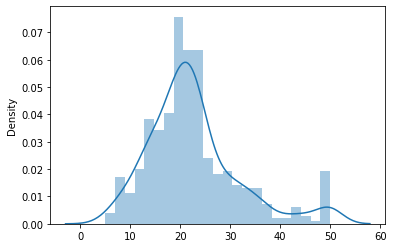

In [10]:
#Let's use the Seaborn library, because it is prettier ;) 
import seaborn as sns
sns.distplot(y);

Compute the correlation of each feature with the variable to be estimated or target (`PRICE`). Please, round decimal numbers to 2 decimal places.

**Hint:** Make use of the NumPy function [`corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) for calculating the correlation.

In [16]:
#YOUR CODE HERE
correlation_matrix = np.array( np.zeros((13,1)) )

for i in range(0, 12):
    correlation_matrix[i] = np.corrcoef(y, np.reshape(X[:,i]))
#hay que sacar el maximo valor del array en valor absoluto (para que de igual si es negativo o pos).
print(correlation_matrix)


TypeError: ignored

What is the most correlated feature with the target variable? And the least? What does it mean?

<font color = 'green'> YOUR ANSWER HERE


## 1.2 Data preparation

### 1.2.1 Training, validation and test sets

Splitting the dataset is essential for an unbiased evaluation of the prediction performance. In most cases, it is enough to split the dataset randomly into three subsets:
*   The **training set** is applied to train, or **fit**, the model. For example, it can be used to find the optimal weights, or coefficients, for linear regression, etc.
*   The **validation set** is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal value of `alpha` in a Ridge regressor or the best kernel for the Kernel Ridge regression, you experiment with different values or different types of kernels. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

*   The **test set** is needed for an unbiased evaluation of the final model. It shouldn't be used for fitting or validation tasks.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you!

**Note:** When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this can be reached by setting the "random_state" to a specific integer value. 

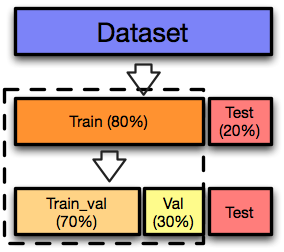

In [ ]:
#Split your data into training and testing (70/30) is indeed a good starting point!)
#For simplicity, use the names X_train, X_test, y_train, and y_test for the corresponding numpy arrays.
#Note: Set random_state to a fixed value, for example, 42
#YOUR CODE HERE
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3)



#Estandarizar: que todos los campos tengan la misma media y varianza.

In [ ]:
#Now, split your training data into two subsets: train_val and val (70/30). 
#For simplicity, use the names X_train_val, X_val, y_train_val, and y_val for the corresponding numpy arrays.
#Note: Set random_state to a fixed value, for example, 42
#YOUR CODE HERE
X_train_val, X_val, y_train_val, y_val = sklearn.model_selection.train_test_split(X_train,y_train,test_size=0.3,train_size =0.7,random_state = 42)

In [ ]:
#How many samples are there in training, validation, and test sets, respectively?
#YOUR CODE HERE


# <font color = 'black'> 2. Modeling </font>

## 2.1 Regression evaluation metrics

Here are three common evaluation metrics for regression problems:

*   **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\text{MAE} = \frac 1K\sum_{k=1}^K\Big|y^{(k)}-\hat{y}^{(k)}\Big|$$

*   **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\text{MSE} =\frac 1K\sum_{i=k}^K\Big(y^{(k)}-\hat{y}^{(k)}\Big)^2$$

*  **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\text{RMSE} = \sqrt{\frac 1K\sum_{i=k}^k\Big(y^{(k)}-\hat{y}^{(k)}\Big)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand because it's the average error.
- **MSE** is more popular than MAE because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE because RMSE is interpretable in the "y" units.

All of these are **loss functions**because we want to minimize them.

## 2.2 Scale the inputs
The ranges of variation of the variables conforming to the observations can be very different. Therefore, a typical pre-processing operation consists of normalizing the input variables so that they have comparable ranges.

Perhaps the most used scaling within the machine learning community is standardization. It consists of a linear transformation that leaves each variable with zero mean and unit variance. The idea is to transform every variable in every observation by subtracting its mean and dividing by its standard deviation.

Scikit learn model [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) can perform this job for you!


In [ ]:
from sklearn.preprocessing import StandardScaler
#For this purpose, perform the following operations:
#   - Create an instance of 'StandardScaler'
std_scaler = StandardScaler()
#   - Fit the scaler with the training data
X_test_s = std_scaler.fit_trasform(X_train_val)#El scaler aprende los valores de X_train (lo entrenamos)
X_val_s = std_scaler.transform(X_val)
X_test_s = std_scaler.transform(X_test)

#   - Create three new matrices:
#       * X_train_s: It contains the result of transforming 'X_train_val' with the scaler
#       * X_val_s: It contains the result of transforming 'X_val' with the scaler
#       * X_test_s: It contains the result of transforming 'X_test' with the scaler
#YOUR CODE HERE

<font color = 'black'> 
From now on, please work with **standardized features**.

$\underline{\text{Note}}$: Standardization is done to normalize data so that priority is not given to a particular feature. The role of scaling is mostly important in algorithms that, for example, are based on distance.


## 2.3 Designing the estimation models

### 2.3.1 Linear regression

> **Training the model**

*   First, import the package: from `sklearn.linear_model import LinearRegression`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
The variety of methods and attributes available for regression are shown [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
#YOUR CODE HERE
#cada regresor tiene fit: entrenamiento y predict: prediccion.
from sklearn.linear_model import LinearRegression
model_obj = LinearRegression().fit(X_train_val,X_test_s)

> **Prediction from our model**

Let us grab predictions off our test set and see how well it did!

In [ ]:
#YOUR CODE HERE


> **Evaluation the model**

Let's evaluate the model by computing the MAE, MSE, and RMSE metrics and print out the results. Please round the three numbers to 2 places.


In [ ]:
#YOUR CODE HERE

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs. the estimated value obtained for the training set.
# YOUR CODE HERE

Having a look at the scatter plot, are there outliers in the dataset? Justify your answer.

$\underline{\text{Note}}$: An outlier is a sample or observation that is an abnormal distance from other samples. In other words, it is data that lies outside the other values in the set. 
If you had Pinocchio in a class of children, the length of his nose compared to the other children, would be an outlier. 


<font color = 'green'> YOUR ANSWER HERE


###2.3.2 Linear Ridge Regression

> **Selecting the best value of alpha**

The first task here is to obtain a reasonable value of `alpha` for the linear Ridge regressor. In this assignment the corresponding ranges that will be explored for `alpha` are: `[0.1, 1, 5, 10, 20, 25, 30, 40, 50]`. For each value of `alpha`, compute the MSE for the validation set and plot all the metrics in the same figure.

*   First, import the package: from `sklearn.linear_model import Ridge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the MSE for the validation data and keep it in a 1D array.


In [ ]:
# YOUR CODE HERE

What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of alpha.
*   Let us evaluate the model by computing the MAE, MSE, and RMSE metrics (over the test set) and print out the results. Please round the three numbers to 2 places.

In [ ]:
# YOUR CODE HERE

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best value of alpha for the training set.
# YOUR CODE HERE

###2.3.3 Linear Lasso Regression

> **Selecting the best value of alpha**

As previously, the first task is to obtain a reasonable value of `alpha` for the Lasso regressor. 

In this assignment, the corresponding ranges that will be explored for `alpha` are: `[0.001, 0.01, 0.05, 0.1, 1, 5, 10]`. For each value of `alpha`, compute the MSE for the validation set and plot all the metrics in the same figure.

*   First, import the package: from `sklearn.linear_model import Lasso`
*   Then, create the model object.
*   Next, fit the subtraining data. This creates a trained model (an object) of class regression.
*   Then, compute the MAE for the validation data and keep it in a 1D array. Draw the alpha values in a log scale to analyze them well.



In [ ]:
# YOUR CODE HERE

What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of `alpha`.
*   Let's evaluate the model by computing the MAE, MSE, and RMSE metrics (over the test set) and print out the results. Please round the three metrics to 2 places.

In [ ]:
# YOUR CODE HERE

### 2.3.4 Kernel Ridge Regression

> **Selecting the best values of alpha and gamma**

The kernel used is `rbf`. RBF kernels are the most generalized form of kernelization and are one of the most widely used kernels due to their similarity to the Gaussian distribution.


Therefore, the first task is to obtain a reasonable value of `alpha` and `gamma` for the Kernel Ridge regressor. 

In this assignment the corresponding ranges that will be explored for `alpha` are: `[0.001, 0.01, .1, 1]` and for `gamma`: `[0.1, 1, 10, 20, 30, 50, 75, 100]`. For each value of `alpha` and `gamma`, compute the MSE for the validation set and plot all the metrics in the same figure.

*   First, import the package: from `sklearn.kernel_ridge import KernelRidge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the MSE for the validation data and keep it in a 2D array.

 

In [ ]:
# YOUR CODE HERE

What is the best value for `gamma`? And for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

> **Training and evaluating the model**

*   Now, create a `Kernel Ridge Regression` model object.
*   Next, fit the training data with the best value of `alpha` and `gamma` 
*   Let us evaluate the model by computing the MAE, MSE, and RMSE metrics (over the test set) and print out the results. Please round the three metrics to 2 places.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best values of alpha and gamma for the training set
# YOUR CODE HERE

Is there any difference between this representation and that obtained for the other regressor explored in this assignment? 

<font color = 'green'> YOUR ANSWER HERE

# <font color = 'black'> 3. Role of each variable in the model </font>

As was explained in the master class, models in Section 2 enable us to analyze the role of each variable within the predictive function $f(\mathbf x)$.

## 3.1. Linear regression case
In the linear regression case
$$
f(\mathbf x) = \mathbf w^\top \mathbf x + w_0 = w_0 + \sum_{k=1}^d w_kx_k
$$each variable $x_k$ contribution to the predictive function is its value multiplied by the weight $w_k$.

**Relate the value of $w_k$ with the relevance of $x_k$**.

Retrieve the weights of the  linear regressor in Section 2.3.1 and compare this relevance of the variables based on these weights with the ranking of variables found in Subsection 1.1 (when you computed the correlation).

**Hint:** Think about the sign and the absolute value of $w_k$.

In [ ]:
#YOUR CODE HERE

What is the most relevante feature? And the least one?

<font color = 'green'> YOUR ANSWER HERE


## 3.4 Linear regression with the best features

Based on the previous results, **select the 4 most important features** and train and evaluate a linear regression model using only these features.

In [ ]:
#YOUR CODE HERE

In [ ]:
#YOUR CODE HERE

In [ ]:
#YOUR CODE HERE

Compare the abovementioned results with those obtained when using all the features. Is there any significant degradation in the results?

<font color = 'green'> YOUR ANSWER HERE

# <font color = 'black'> 5. Best regression model </font>

It has always been said that we understand faster when we visualize data. In this last section of the assginment, we will find out which regression model is the best fit for our data!





Reprsent, by using a barplot, the MSE obtained by each regression model evaluated in this assignment (with its best parameters) for the test set. Include also the value reached when using the 4 best features with a linear regression model.



In [ ]:
# YOUR CODE HERE

### **This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now!**